In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

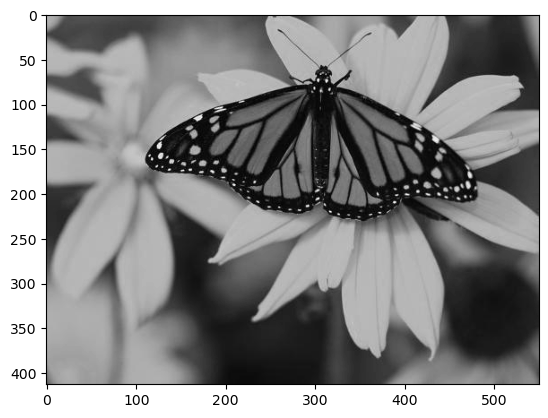

In [2]:
bgr=cv2.imread("imag1.jpg")
rgb=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap="gray")

In [41]:
def ro(image):
    """Applies the Roberts cross operator for edge detection."""
    # Define the Roberts Cross kernels for horizontal and vertical edges
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)  # Horizontal edges
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)  # Vertical edges

    # Convolve the image with both kernels to get the gradients
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the gradient magnitude (edge strength) using Pythagorean theorem
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Normalize the magnitude image to the range [0, 255]
    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    return magnitude


In [42]:
ro=ro(img)

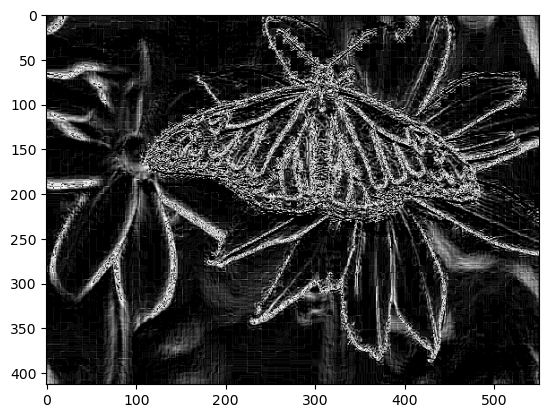

In [44]:
plt.imshow(ro,cmap='gray')

In [52]:
def po(image):
    """Applies the Prewitt operator for edge detection."""
    # Define the Prewitt kernels for horizontal and vertical edge detection
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)  # Horizontal edges
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)  # Vertical edges

    # Convolve the image with both kernels to get the gradients
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the gradient magnitude (edge strength) using Pythagorean theorem
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Normalize the magnitude image to the range [0, 255]
    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    return magnitude

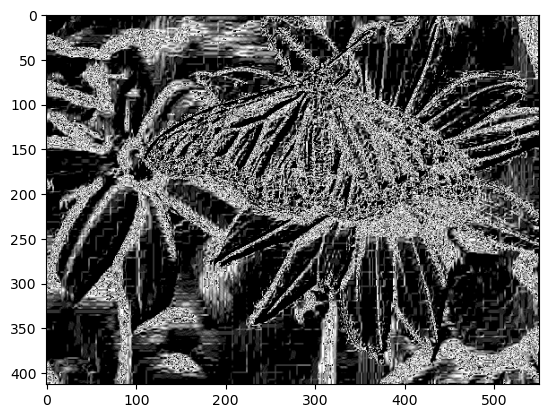

In [53]:
po=po(img)
plt.imshow(po,cmap='gray')

In [54]:
def so(image):
    """Applies the Prewitt operator for edge detection."""
    # Define the Prewitt kernels for horizontal and vertical edge detection
    kernel_x = np.array([[-3,0,3], [-10, 0, 10], [-3, 0, 3]], dtype=np.float32)  # Horizontal edges
    kernel_y = np.array([[-3,-10,-3], [0, 0, 0], [3,10,3]], dtype=np.float32)  # Vertical edges

    # Convolve the image with both kernels to get the gradients
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the gradient magnitude (edge strength) using Pythagorean theorem
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Normalize the magnitude image to the range [0, 255]
    magnitude = np.uint8(np.clip(magnitude, 0, 255))

    return magnitude

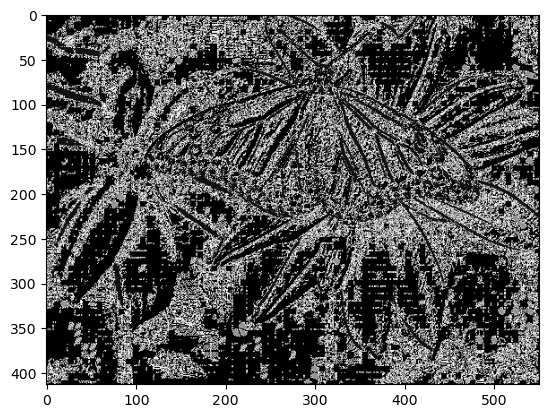

In [55]:
so=so(img)
plt.imshow(so,cmap='gray')

In [3]:
import numpy as np

def gaussian_blur(image, kernel_size, sigma):
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = kernel @ kernel.T
    blurred_image = cv2.filter2D(image, -1, gaussian_kernel)
    return blurred_image
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    grad_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    magnitude = cv2.magnitude(grad_x, grad_y)
    angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)
    return magnitude, angle

blurred_image = gaussian_blur(img, kernel_size=5, sigma=1.4)
magnitude, angle = sobel_operator(blurred_image)

si = cv2.ximgproc.thinning(np.uint8(magnitude))
edges = cv2.Canny(si,50,150)



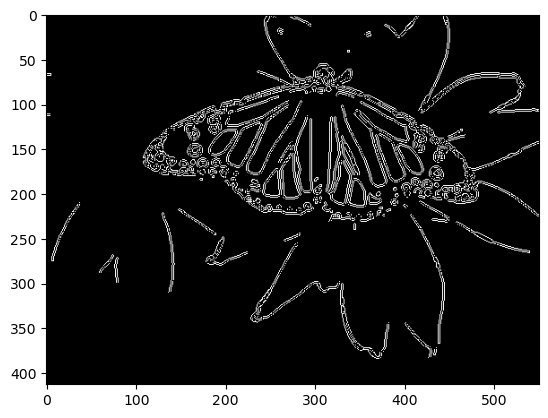

In [4]:
plt.imshow(edges,cmap='gray')

In [5]:
def gaussian_kernel(kernel_size, sigma):
    k = kernel_size // 2
    x = np.linspace(-k, k, kernel_size)
    y = np.linspace(-k, k, kernel_size)
    x, y = np.meshgrid(x, y)
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian = gaussian / np.sum(gaussian)
    return gaussian
    
gaussian = gaussian_kernel(5,1)


In [37]:
def laplacian_of_gaussian(kernel_size, sigma):
    k = kernel_size // 2
    x = np.linspace(-k, k, kernel_size)
    y = np.linspace(-k, k, kernel_size)
    x, y = np.meshgrid(x, y)
    
    log_kernel = (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**4)
    log_kernel = log_kernel / np.sum(np.abs(log_kernel))
    return log_kernel

log_kernel = laplacian_of_gaussian(5,2)


In [38]:
def apply_log_filter(image, kernel_size, sigma):
    log_kernel = laplacian_of_gaussian(kernel_size, sigma)
    log_image = cv2.filter2D(image,-1, log_kernel)
    
    return log_image
log_image = apply_log_filter(img,5,1.0)

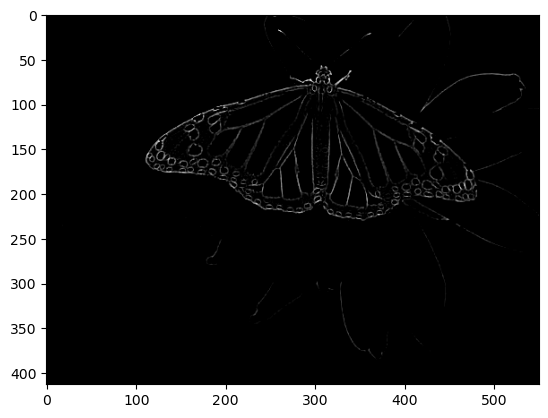

In [39]:
plt.imshow(log_image,cmap='gray')

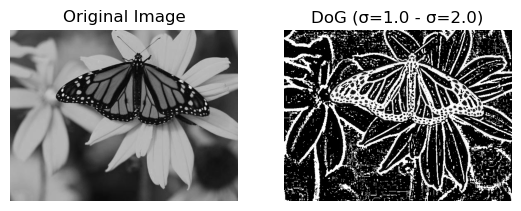

In [40]:

def gaussian_kernel(sigma, size):
    """Generate a 2D Gaussian kernel given sigma and size"""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel

# Apply Gaussian blur manually using convolution
def apply_gaussian_blur(image, sigma):
    """Apply Gaussian blur to the image using a custom kernel"""
    kernel_size = int(6 * sigma + 1)  # Kernel size is typically 6*sigma, rounded to the next odd number
    if kernel_size % 2 == 0:
        kernel_size += 1  # Make sure it's odd
    
    # Generate Gaussian kernel
    kernel = gaussian_kernel(sigma, kernel_size)
    
    # Convolve the image with the kernel (use padding to avoid boundary issues)
    return cv2.filter2D(image, -1, kernel)

# Set sigma values for two Gaussian blurs
sigma1 = 1.0
sigma2 = 2.0

# Apply manual Gaussian blur with two different sigmas
gaussian1 = apply_gaussian_blur(img, sigma1)
gaussian2 = apply_gaussian_blur(img, sigma2)

# Compute the Difference of Gaussians (DoG)
dog_image = gaussian1 - gaussian2

# Display the results
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# DoG result
plt.subplot(1, 3, 2)
plt.title(f"DoG (σ={sigma1} - σ={sigma2})")
plt.imshow(dog_image, cmap='gray')
plt.axis('off')

plt.show()

